In [1]:
import numpy as np
import cv2
import random
import matplotlib.pylab as plt

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, 
                   cmap="gray")    

# 1. 필터

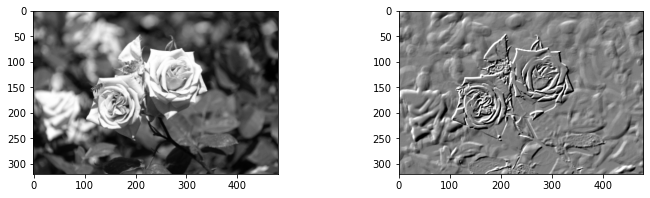

In [2]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

emboss = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]], np.float32)

dst = cv2.filter2D(src, -1, emboss, delta=128)

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

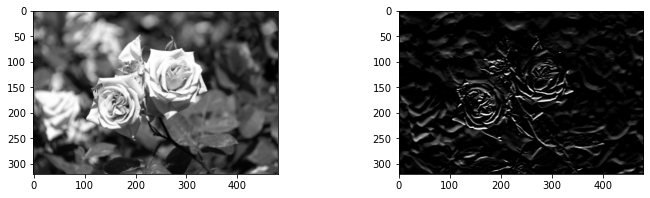

In [3]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

edge = np.array([   [1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]], np.float32)

dst = cv2.filter2D(src, -1, edge, delta=0)

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

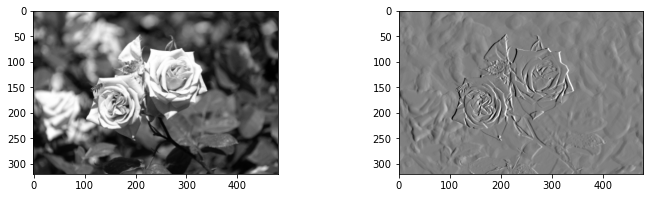

In [4]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

edge = np.array([   [0, 0, 0],
                   [1, 0, -1],
                   [0, 0, 0]], np.float32)

dst = cv2.filter2D(src, -1, edge, delta=128)

plt.figure(figsize=(12, 3))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

# 2. blurring

### 1) Blurring

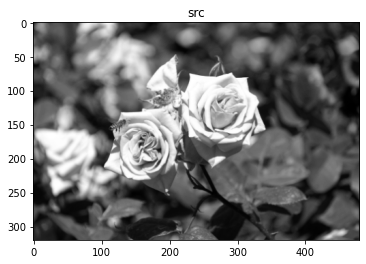

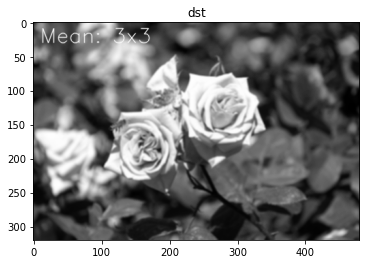

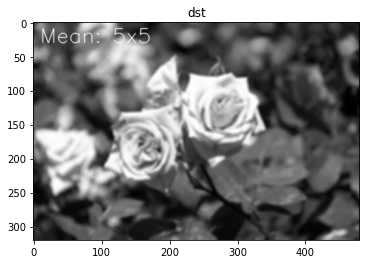

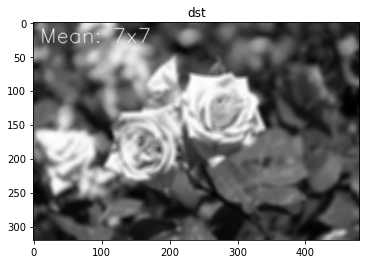

In [5]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

imshow('src', src)
plt.show()

for ksize in (3, 5, 7):
        dst = cv2.blur(src, (ksize, ksize))

        desc = "Mean: %dx%d" % (ksize, ksize)
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)

        imshow('dst', dst)
        plt.show()

### 2) blurring_gaussian

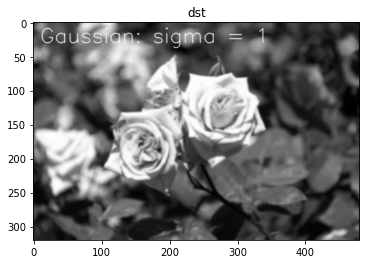

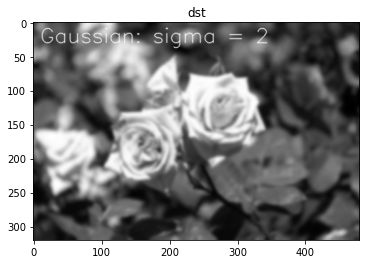

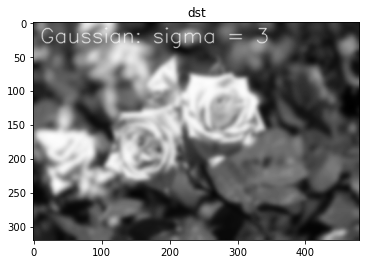

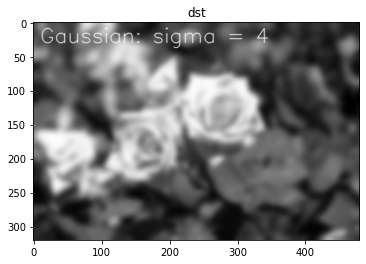

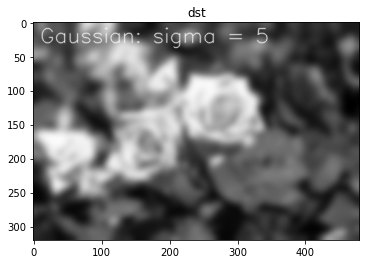

In [6]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

imshow('src', src)

for sigma in range(1, 6):
    
        dst = cv2.GaussianBlur(src, (0, 0), sigma)

        desc = "Gaussian: sigma = %d" % (sigma)
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)

        imshow('dst', dst)
        plt.show()

# 3. Sharpning

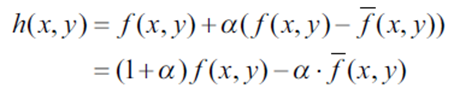

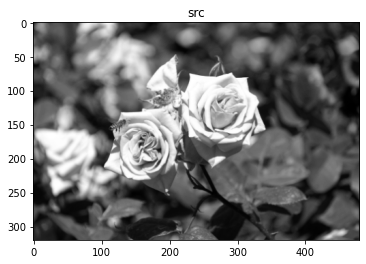

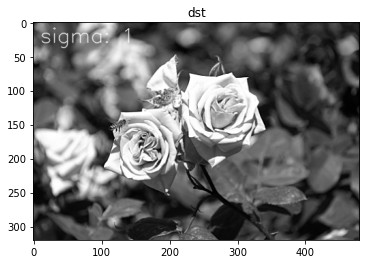

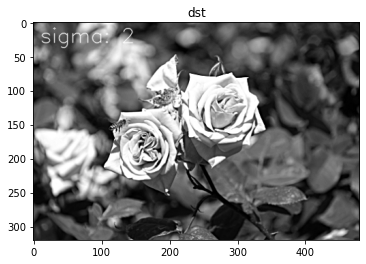

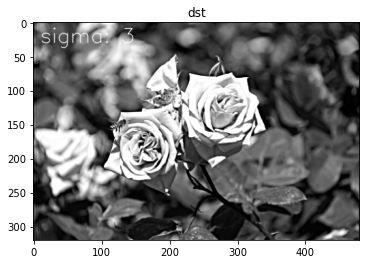

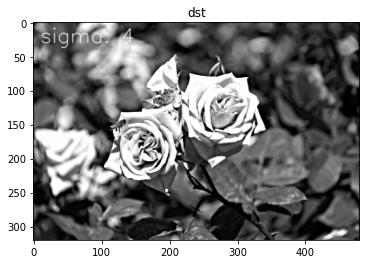

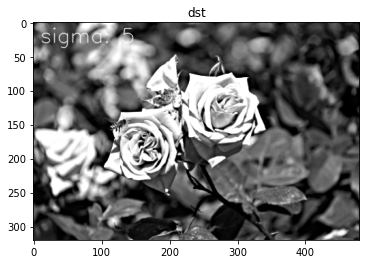

In [7]:
src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

imshow('src', src)
plt.show()

for sigma in range(1, 6):
    blurred = cv2.GaussianBlur(src, (0, 0), sigma)

    alpha = 1.0
    dst = cv2.addWeighted(src, 1 + alpha, blurred, -alpha, 0.0)# above equation

    desc = "sigma: %d" % sigma
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
               1.0, 255, 1, cv2.LINE_AA)

    imshow('dst', dst)
    plt.show()  

# 4. Denosing

### 1) bilateral

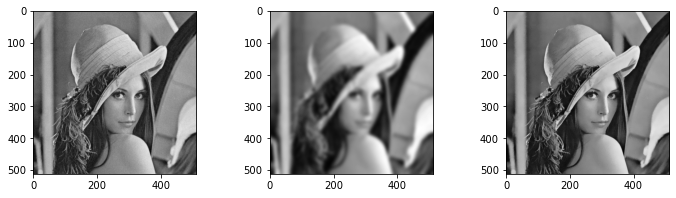

In [8]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

noise = np.zeros(src.shape, np.int32)
cv2.randn(noise, 0, 5)
cv2.add(src, noise, src, dtype=cv2.CV_8UC1)

dst1 = cv2.GaussianBlur(src, (0, 0), 5)
dst2 = cv2.bilateralFilter(src, -1, 10, 5)
    
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("", src)
plt.subplot(1,3,2)
imshow("", dst1)
plt.subplot(1,3,3)
imshow("", dst2)

### 2) median filter

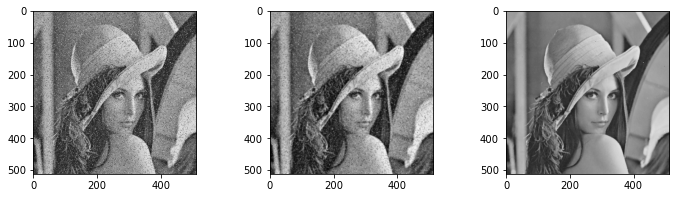

In [9]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255

dst1 = cv2.GaussianBlur(src, (0, 0), 1)
dst2 = cv2.medianBlur(src, 3)

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("", src)
plt.subplot(1,3,2)
imshow("", dst1)
plt.subplot(1,3,3)
imshow("", dst2)

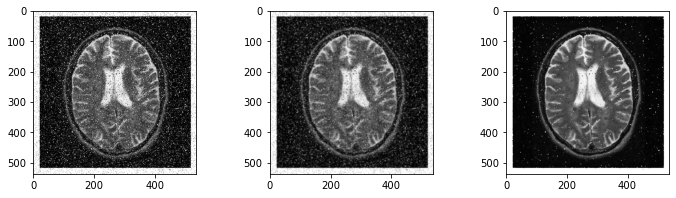

In [5]:
#median
src = cv2.imread('week5.jpg', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255

dst1 = cv2.GaussianBlur(src, (0, 0), 1)
dst2 = cv2.medianBlur(src, 3)

plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("", src)
plt.subplot(1,3,2)
imshow("", dst1)
plt.subplot(1,3,3)
imshow("", dst2)

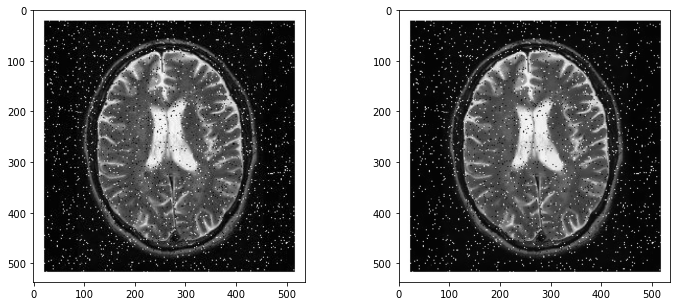

In [10]:
src = cv2.imread('week5.jpg', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.bilateralFilter(src, -1, 10, 5)
    
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst1)

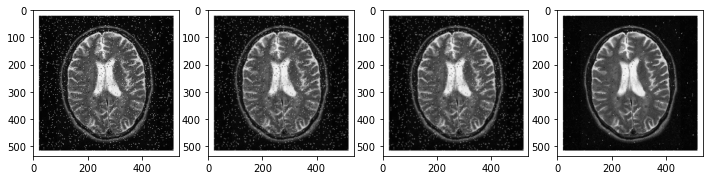

In [11]:
src = cv2.imread('week5.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.blur(src, (3,3))
dst1 = cv2.GaussianBlur(src, (0, 0), 1)
dst2 = cv2.medianBlur(src, 3)

plt.figure(figsize=(12, 5))
plt.subplot(1,4,1)
imshow("", src)
plt.subplot(1,4,2)
imshow("", dst)
plt.subplot(1,4,3)
imshow("", dst1)
plt.subplot(1,4,4)
imshow("", dst2)